In [2]:
import numpy as np 
import math
import os
import glob



from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.animation as animation
# from matplotlib import rc
from IPython.display import HTML
import pandas as pd

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torchvision.io import read_image

from Custom_Datasets import KineticsVideoDataset,KineticsImageDataset
from animate_images import animate_images

c:\Users\thomas\Documents\Atmospheric Turbulence\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
# run to check cuda availability
get_device = lambda : "cuda:0" if torch.cuda.is_available() else "cpu"
get_device()

NameError: name 'torch' is not defined

In [ ]:
def display_image(image):
    image=image.type(torch.float32)
    image = np.transpose(image.numpy(),axes=(1,2,0))
    image = (image+1)/2
    plt.imshow(image)
    plt.show()

# Diffuser

In [3]:
from diffusers import DDPMScheduler,UNet2DModel,DDIMPipeline
from diffusers import DiTPipeline, DPMSolverMultistepScheduler #https://huggingface.co/docs/diffusers/en/api/pipelines/dit



In [ ]:
def display_sample(sample, i):
    image_processed = sample.cpu().permute(0, 2, 3, 1)
    image_processed = (image_processed + 1.0) * 127.5
    image_processed = image_processed.numpy().astype(np.uint8)

    image_pil = Image.fromarray(image_processed[0])
    display(f"Image at step {i}")
    display(image_pil)
    return image_pil

In [ ]:
# from diffusers import StableDiffusionPipeline #https://huggingface.co/runwayml/stable-diffusion-v1-5
# model_id = "runwayml/stable-diffusion-v1-5"
# pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
# pipe = pipe.to("cuda")


# prompt = "a pineapple under the sea"
# image = pipe(prompt).images[0]  

# display(image)


torch.Size([1, 3, 256, 256])


'Image at step 0'

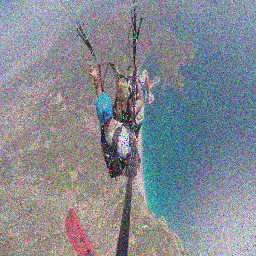

0it [00:00, ?it/s]

'Image at step 46'

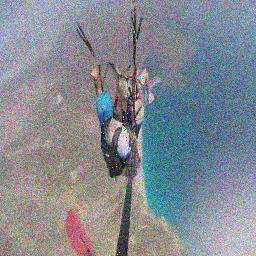

46it [00:00, 397.61it/s]

'Image at step 48'

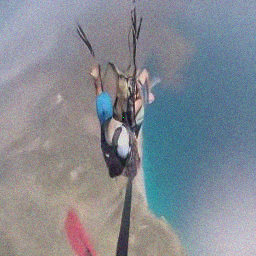

'Image at step 50'

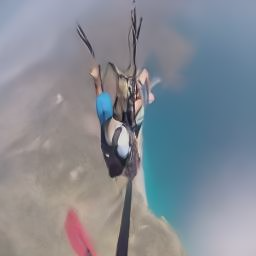

50it [00:00, 151.46it/s]


In [ ]:


# pipe = DDIMPipeline.from_pretrained("google/ddpm-cifar10-32") #https://colab.research.google.com/github/huggingface/notebooks/blob/main/diffusers/diffusers_intro.ipynb
# image = pipe().images[0]
# display(image)

model_id = "google/ddpm-celebahq-256"
scheduler_id = "google/ddpm-celebahq-256"

scheduler = DDPMScheduler.from_pretrained(scheduler_id)
model = UNet2DModel.from_pretrained(model_id).to("cuda")
# print(model)

scheduler.set_timesteps(50)
# print(scheduler)

sample_size = model.config.sample_size
noise = torch.randn((1, model.config.in_channels, sample_size, sample_size), device="cuda")
# noise = (0.2*noise+0.8*(features.to("cuda")[0].unsqueeze(0)))
print(noise.size())
input = noise
display_sample(input,0)
for i,t in tqdm(enumerate(scheduler.timesteps)):
    if i<44:
        continue
    with torch.no_grad():
        noisy_residual = model(sample=input, timestep=t).sample
        prev_noisy_sample = scheduler.step(noisy_residual, t, input).prev_sample
        input = prev_noisy_sample
        if (i +1) % 2 == 0:
            display_sample(input,i+1)

